## safe_Driver_Classification

In [4]:

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple, Counter
from time import time
import warnings
from IPython.display import display

# sklearn modules
from sklearn.metrics import (
    accuracy_score, roc_auc_score, auc, roc_curve, confusion_matrix, 
    classification_report, matthews_corrcoef
)
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, VotingClassifier
)

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from mlxtend.classifier import StackingClassifier

from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import ttest_ind

%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.3f}'.format
mpl.rcParams['figure.dpi'] = 300

warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
warnings.simplefilter('ignore')


#### Import the necessary packages of Python 


In [5]:


import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple, Counter
from time import time
import warnings
from IPython.display import display


from sklearn.metrics import (
    accuracy_score, roc_auc_score, auc, roc_curve, confusion_matrix, 
    classification_report, matthews_corrcoef
)
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, VotingClassifier
)


import xgboost as xgb
from xgboost.sklearn import XGBClassifier


from mlxtend.classifier import StackingClassifier


from imblearn.under_sampling import RandomUnderSampler


from scipy.stats import ttest_ind

#### Setting options and styles for visualization 

In [6]:

%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.3f}'.format
mpl.rcParams['figure.dpi'] = 300

#### Suppressing annoying harmless warning

In [7]:

warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
warnings.simplefilter('ignore')

In [8]:

safe_driver = pd.read_excel('D:\downloads\IT_3.xlsx')

display(safe_driver)

,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State
0,1,1,F,522,656,1,0,Married,Car,14749.000,5,<18,>350,<3,<15k,Fair,IL
1,2,1,F,691,704,16,0,Married,Car,15389.000,6,28-34,>350,15-30,15k-25k,Good,NJ
2,3,1,M,133,691,15,0,Married,Van,9956.000,3,>40,90-160,15-30,<15k,Good,CT
3,4,1,M,146,720,9,0,Married,Van,77323.000,3,18-27,90-160,9-14',>25k,Good,CT
4,5,1,M,128,771,33,1,Married,Van,14183.000,4,>40,90-160,>30,<15k,Very Good,WY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,30236,1,F,398,491,6,3,Single,Truck,14509.000,2,35-40,>350,3-8',>25k,Very Poor,VT
30236,30237,0,M,128,745,22,4,Single,Utility,8597.000,6,>40,90-160,15-30,<15k,Very Good,OK
30237,30238,0,M,89,523,4,1,Married,Truck,49747.000,2,<18,<90,3-8',>25k,Very Poor,NY
30238,30239,1,F,129,703,14,1,Married,Truck,7553.000,1,>40,90-160,9-14',<15k,Good,NJ


In [9]:

negative_values_sum = safe_driver.select_dtypes(include='number').apply(lambda x: pd.to_numeric(x, errors='coerce').fillna(0)).where(lambda x: x < 0).sum()

print("Sum of negative values:")
print(negative_values_sum)

Sum of negative values:
ID                      0.000
target                  0.000
EngineHP                0.000
credit_history          0.000
Years_Experience        0.000
annual_claims           0.000
Miles_driven_annually   0.000
size_of_family          0.000
dtype: float64


In [10]:

safe_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            30240 non-null  int64  
 1   target                        30240 non-null  int64  
 2   Gender                        30240 non-null  object 
 3   EngineHP                      30240 non-null  int64  
 4   credit_history                30240 non-null  int64  
 5   Years_Experience              30240 non-null  int64  
 6   annual_claims                 30240 non-null  int64  
 7   Marital_Status                30240 non-null  object 
 8   Vehical_type                  30240 non-null  object 
 9   Miles_driven_annually         30232 non-null  float64
 10  size_of_family                30240 non-null  int64  
 11  Age_bucket                    30240 non-null  object 
 12  EngineHP_bucket               30240 non-null  object 
 13  Y

In [11]:
safe_driver.describe()

,ID,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
count,30240.000,30240.000,30240.000,30240.000,30240.000,30240.000,30232.000,30240.000
mean,15120.500,0.708,196.604,685.770,13.256,1.138,17422.939,4.521
std,8729.680,0.455,132.347,102.454,9.890,1.083,17483.783,2.287
min,1.000,0.000,80.000,300.000,1.000,0.000,5000.000,1.000
25%,7560.750,0.000,111.000,668.000,5.000,0.000,9668.500,3.000
50%,15120.500,1.000,141.000,705.000,10.000,1.000,12280.000,5.000
75%,22680.250,1.000,238.000,753.000,20.000,2.000,14697.250,7.000
max,30240.000,1.000,1005.000,850.000,40.000,4.000,99943.000,8.000


In [12]:
from scipy import stats
x, _ = stats.boxcox(safe_driver['credit_history'])

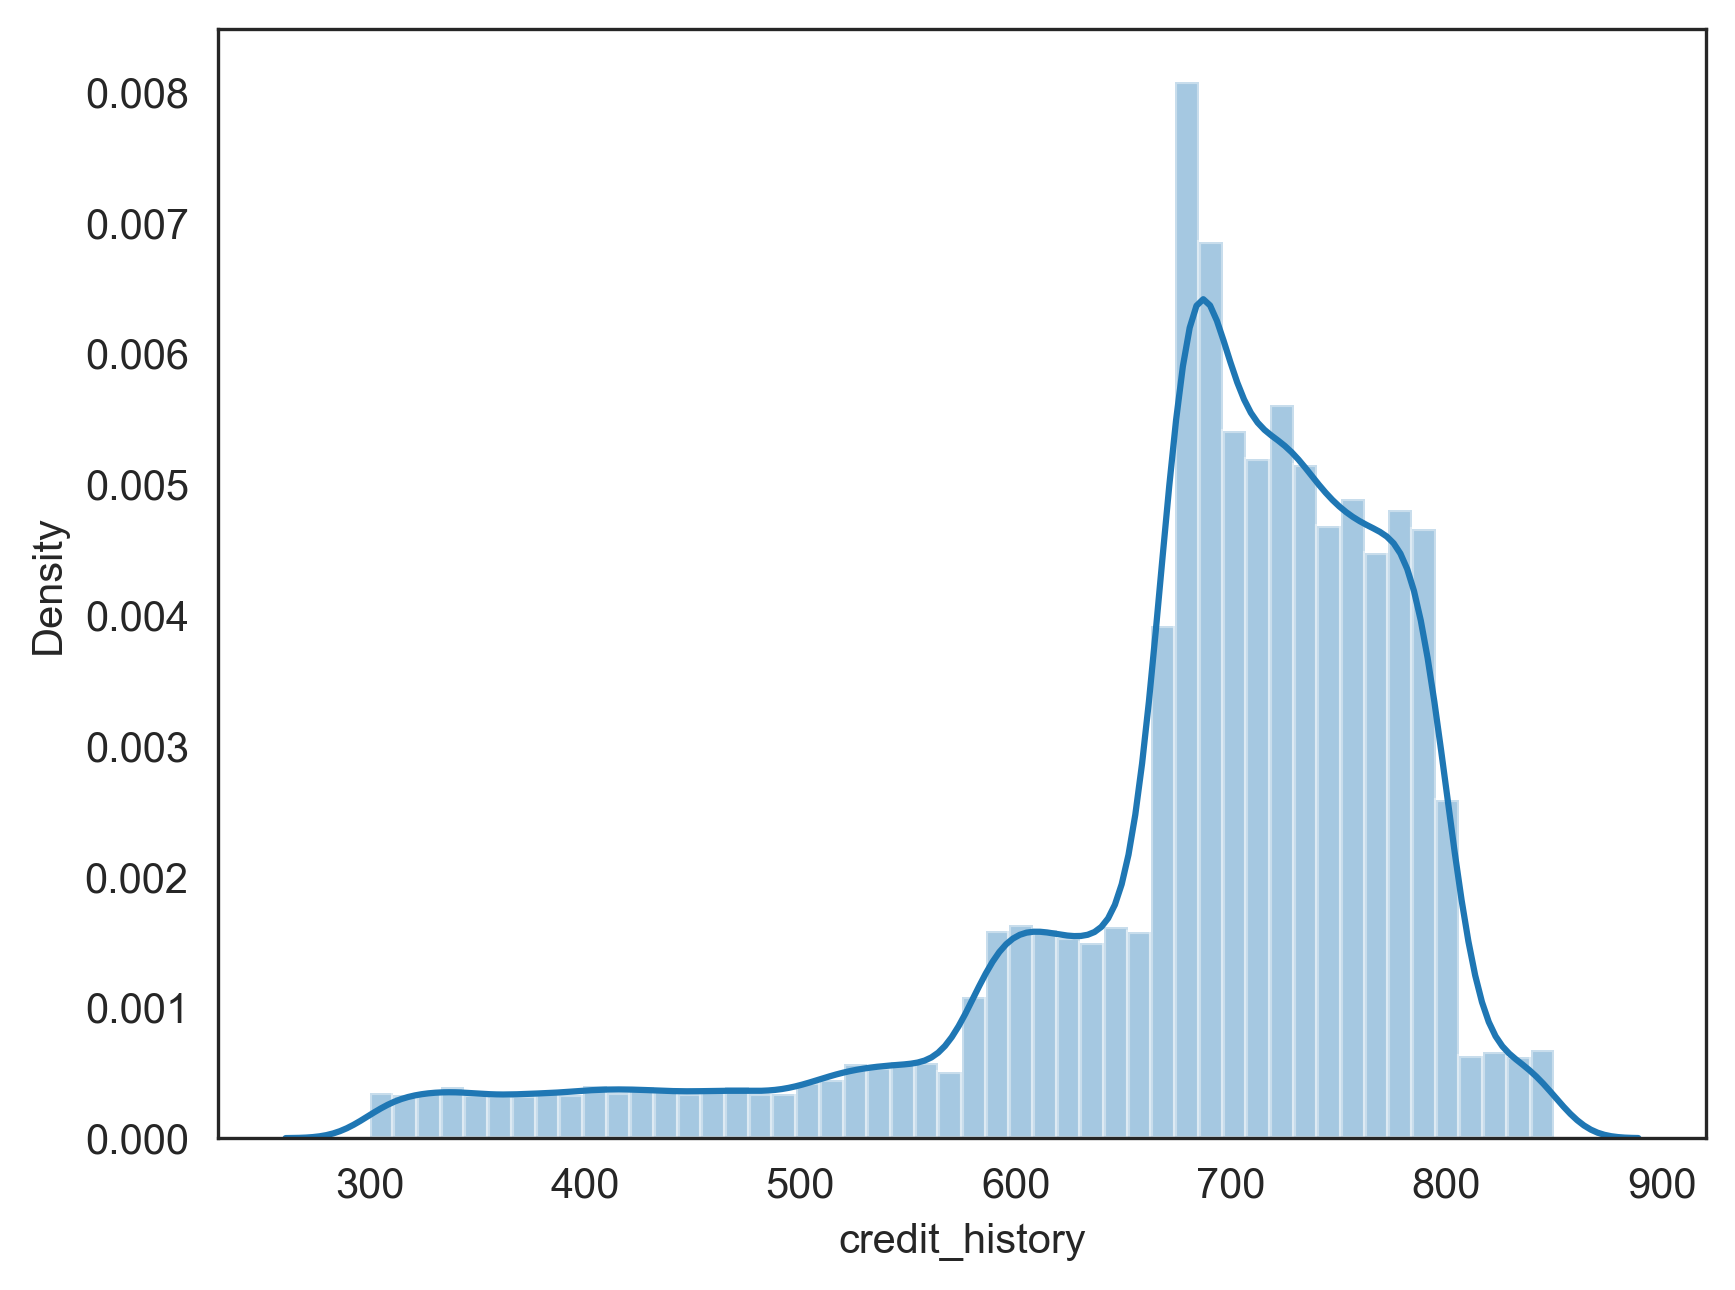

In [13]:
ax = sns.distplot(safe_driver.credit_history)

In [14]:

true_claims = (safe_driver['target'] == 1).sum()
print('True Claims is  {}'.format(true_claims))

total_records = len(safe_driver['target'])
print('Total number of records is {}'.format(total_records))

print('The percentage of true claims is {}%'.format(
    round(true_claims / total_records * 100), 2))

True Claims is  21396
Total number of records is 30240
The percentage of true claims is 71%


In [15]:
cat_features = safe_driver.select_dtypes(include=['object']).copy()
print(cat_features.columns)

Index(['Gender', 'Marital_Status', 'Vehical_type', 'Age_bucket',
       'EngineHP_bucket', 'Years_Experience_bucket',
       'Miles_driven_annually_bucket', 'credit_history_bucket', 'State'],
      dtype='object')


In [16]:

safe_driver.drop(['ID', 'EngineHP_bucket', 'Years_Experience_bucket',
                  'Miles_driven_annually_bucket',
                  'credit_history_bucket'], axis=1, inplace=True)

In [17]:

safe_driver.isnull().sum()

target                   0
Gender                   0
EngineHP                 0
credit_history           0
Years_Experience         0
annual_claims            0
Marital_Status           0
Vehical_type             0
Miles_driven_annually    8
size_of_family           0
Age_bucket               0
State                    0
dtype: int64

In [18]:
safe_driver[safe_driver.isnull().any(axis=1)]

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,State
1235,1,F,124,793,27,0,Married,Truck,NaN,3,>40,NJ
7365,0,F,465,696,5,0,Married,Truck,NaN,8,18-27,SD
11464,1,F,137,787,18,1,Married,Truck,NaN,1,>40,CT
18158,0,F,108,747,8,1,Married,Truck,NaN,1,18-27,OR
19795,1,F,121,774,19,0,Married,Truck,NaN,2,28-34,NY
25731,1,F,355,694,15,1,Married,Truck,NaN,5,28-34,CT
26512,1,F,109,743,40,0,Married,Truck,NaN,1,>40,OR
27045,1,F,83,784,21,0,Married,Truck,NaN,1,>40,CT


In [19]:

safe_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target                 30240 non-null  int64  
 1   Gender                 30240 non-null  object 
 2   EngineHP               30240 non-null  int64  
 3   credit_history         30240 non-null  int64  
 4   Years_Experience       30240 non-null  int64  
 5   annual_claims          30240 non-null  int64  
 6   Marital_Status         30240 non-null  object 
 7   Vehical_type           30240 non-null  object 
 8   Miles_driven_annually  30232 non-null  float64
 9   size_of_family         30240 non-null  int64  
 10  Age_bucket             30240 non-null  object 
 11  State                  30240 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.8+ MB


In [20]:

safe_driver_num_features = safe_driver.drop(
    safe_driver.select_dtypes(['object']), axis=1)

safe_driver_num_features.drop(['target'], axis=1, inplace=True)

safe_driver_cat_features = safe_driver.select_dtypes(['object'])

In [21]:

safe_driver_num_features[safe_driver_num_features.isnull().any(axis=1)]

,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
1235,124,793,27,0,NaN,3
7365,465,696,5,0,NaN,8
11464,137,787,18,1,NaN,1
18158,108,747,8,1,NaN,1
19795,121,774,19,0,NaN,2
25731,355,694,15,1,NaN,5
26512,109,743,40,0,NaN,1
27045,83,784,21,0,NaN,1


In [22]:
from sklearn import preprocessing
safe_driver_scaled = pd.DataFrame(preprocessing.scale(safe_driver_num_features),
 columns=safe_driver_num_features.columns)


In [23]:

safe_driver = pd.concat(
    [safe_driver_scaled, safe_driver['target'], safe_driver_cat_features], axis=1)

safe_driver_scaled = pd.concat(
    [safe_driver_scaled, safe_driver['target']], axis=1)

In [24]:
safe_driver.head(10)

,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family,target,Gender,Marital_Status,Vehical_type,Age_bucket,State
0,2.459,-0.291,-1.239,-1.051,-0.153,0.209,1,F,Married,Car,<18,IL
1,3.736,0.178,0.277,-1.051,-0.116,0.647,1,F,Married,Car,28-34,NJ
2,-0.481,0.051,0.176,-1.051,-0.427,-0.665,1,M,Married,Van,>40,CT
3,-0.382,0.334,-0.430,-1.051,3.426,-0.665,1,M,Married,Van,18-27,CT
4,-0.518,0.832,1.996,-0.128,-0.185,-0.228,1,M,Married,Van,>40,WY
5,-0.397,0.354,0.480,-0.128,-0.298,1.521,1,F,Married,Truck,>40,DE
6,-0.345,0.998,1.794,1.719,-0.198,-1.103,1,F,Married,Truck,>40,NJ
7,-0.821,0.598,0.783,-0.128,-0.184,0.209,1,F,Single,Car,>40,ME
8,3.449,0.305,2.097,-1.051,-0.019,-1.540,1,F,Married,Car,>40,CA
9,-0.579,0.969,0.581,-0.128,-0.648,-1.540,0,F,Married,Truck,35-40,NJ


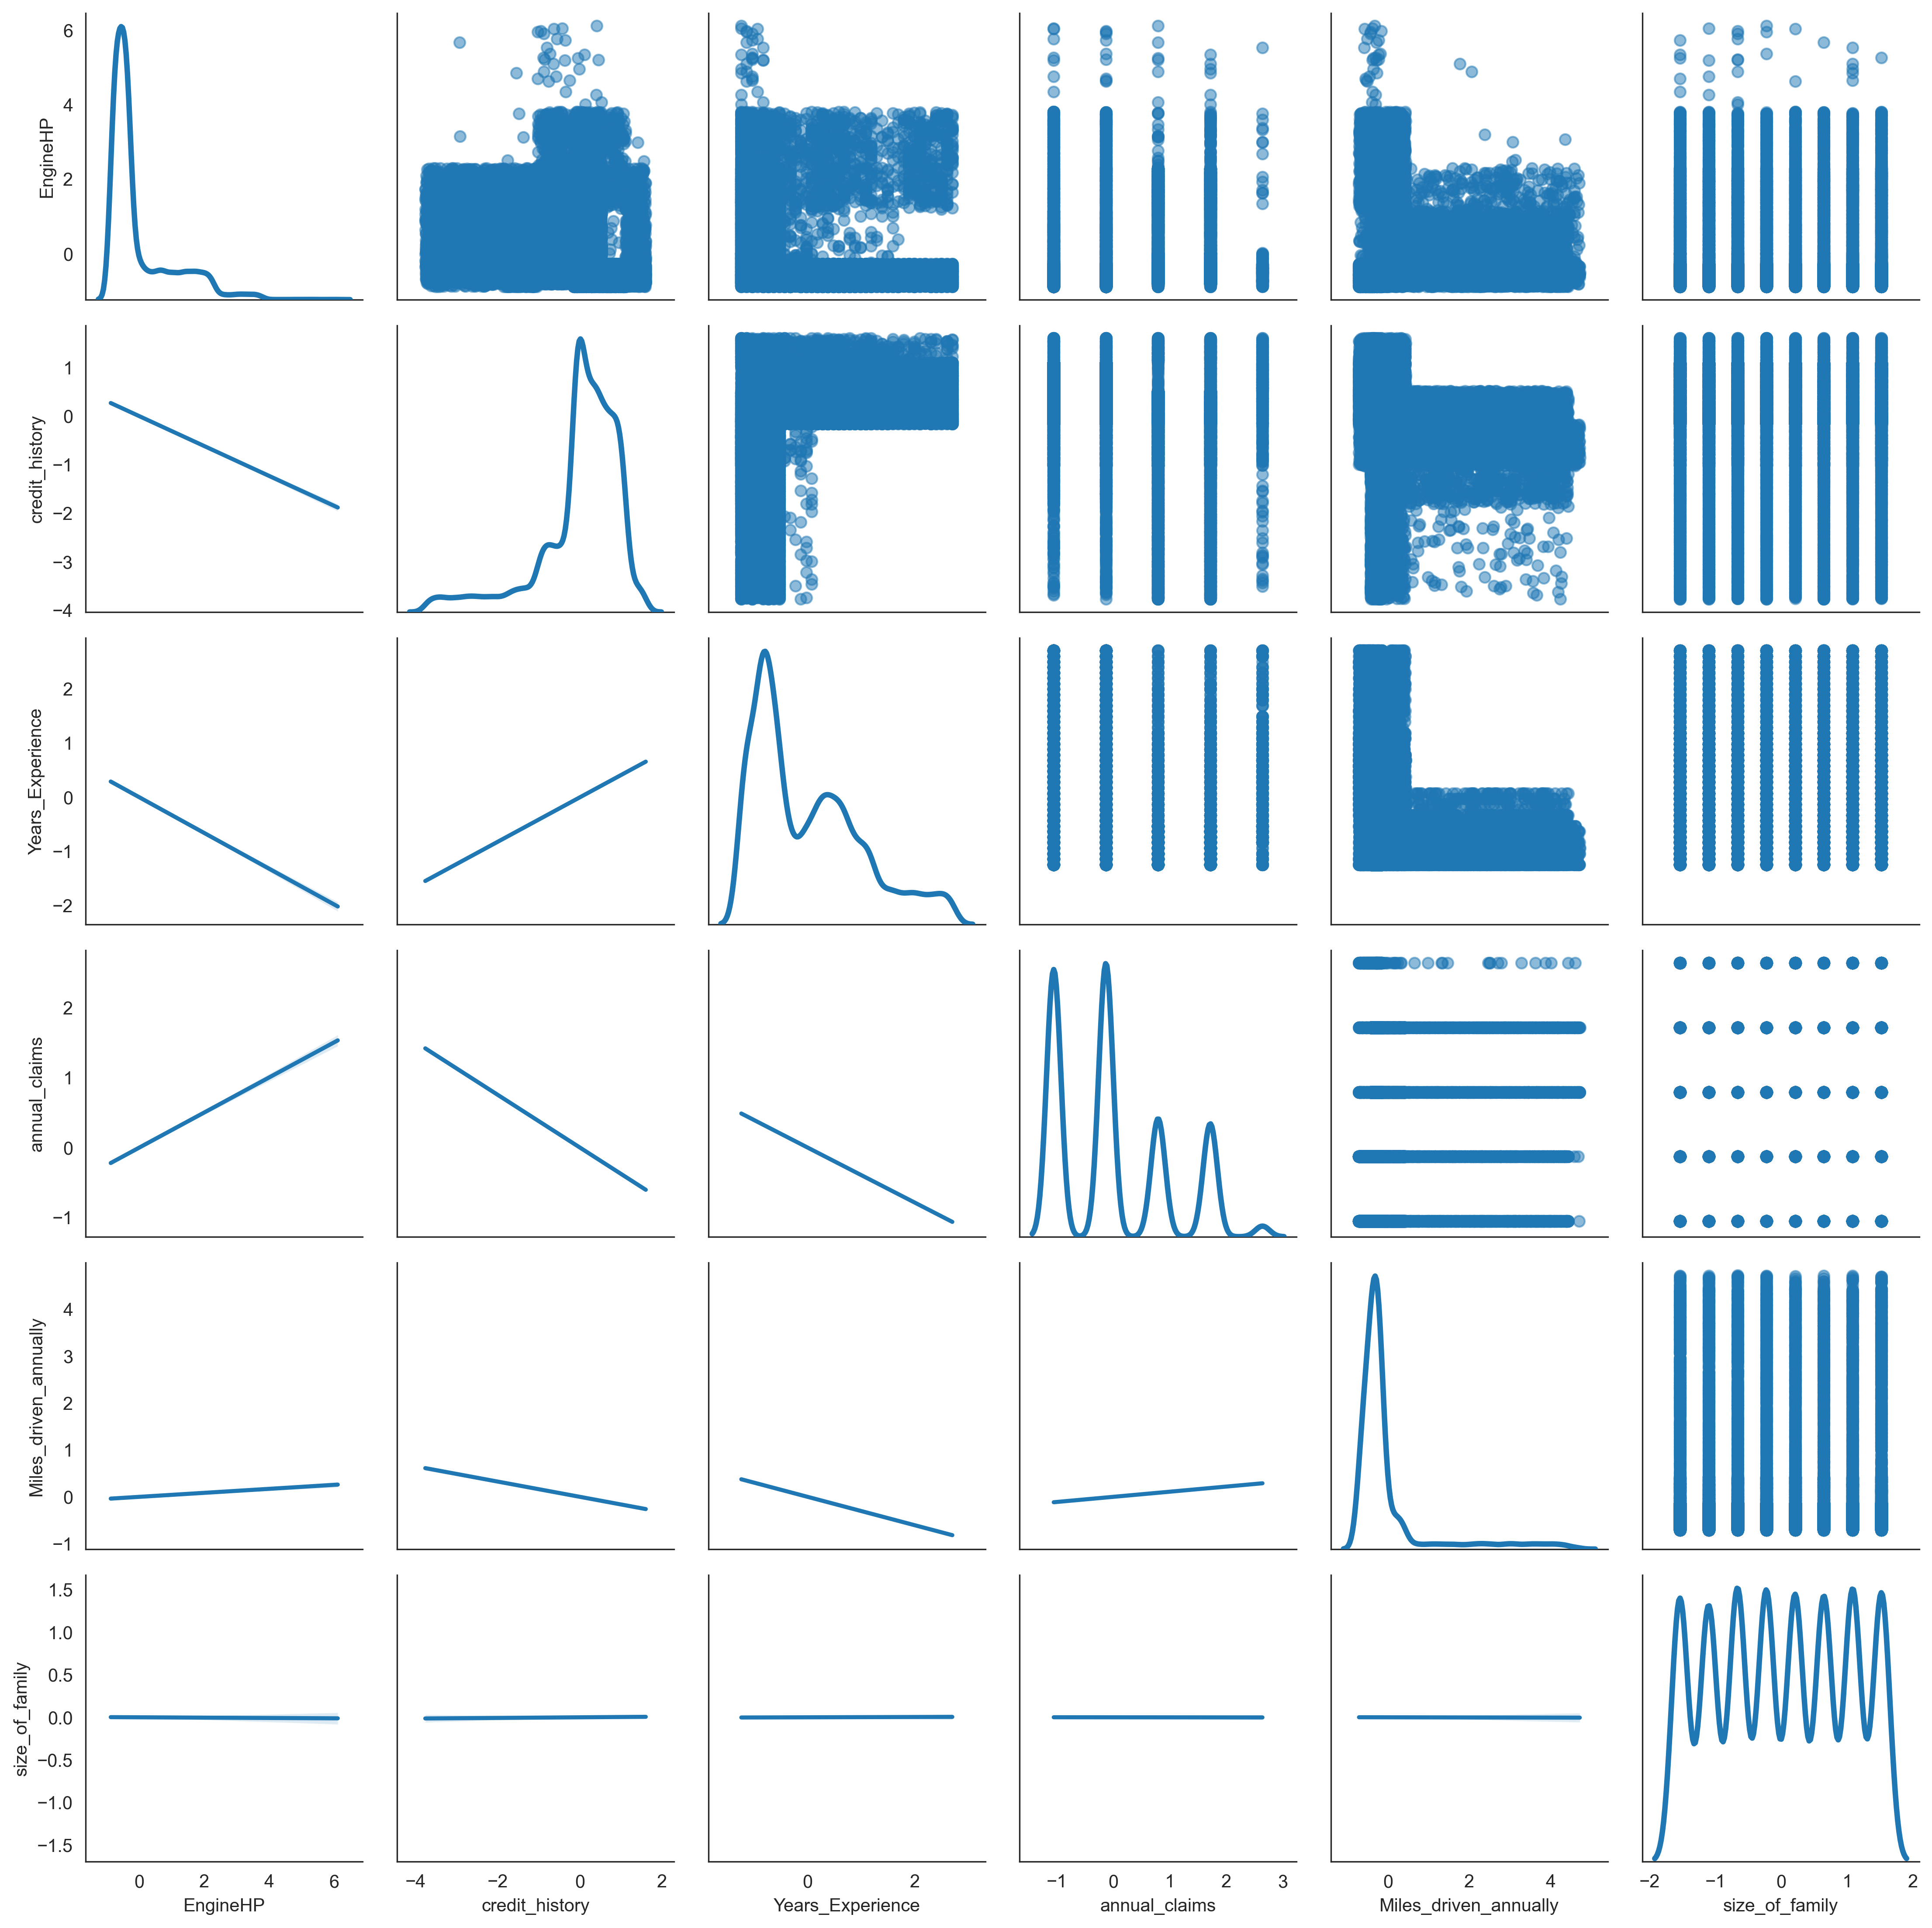

In [25]:

safe_driver_copy = safe_driver.drop(['target'], axis=1)
g = sns.PairGrid(safe_driver_copy.dropna(),
diag_sharey=False) 
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

[]

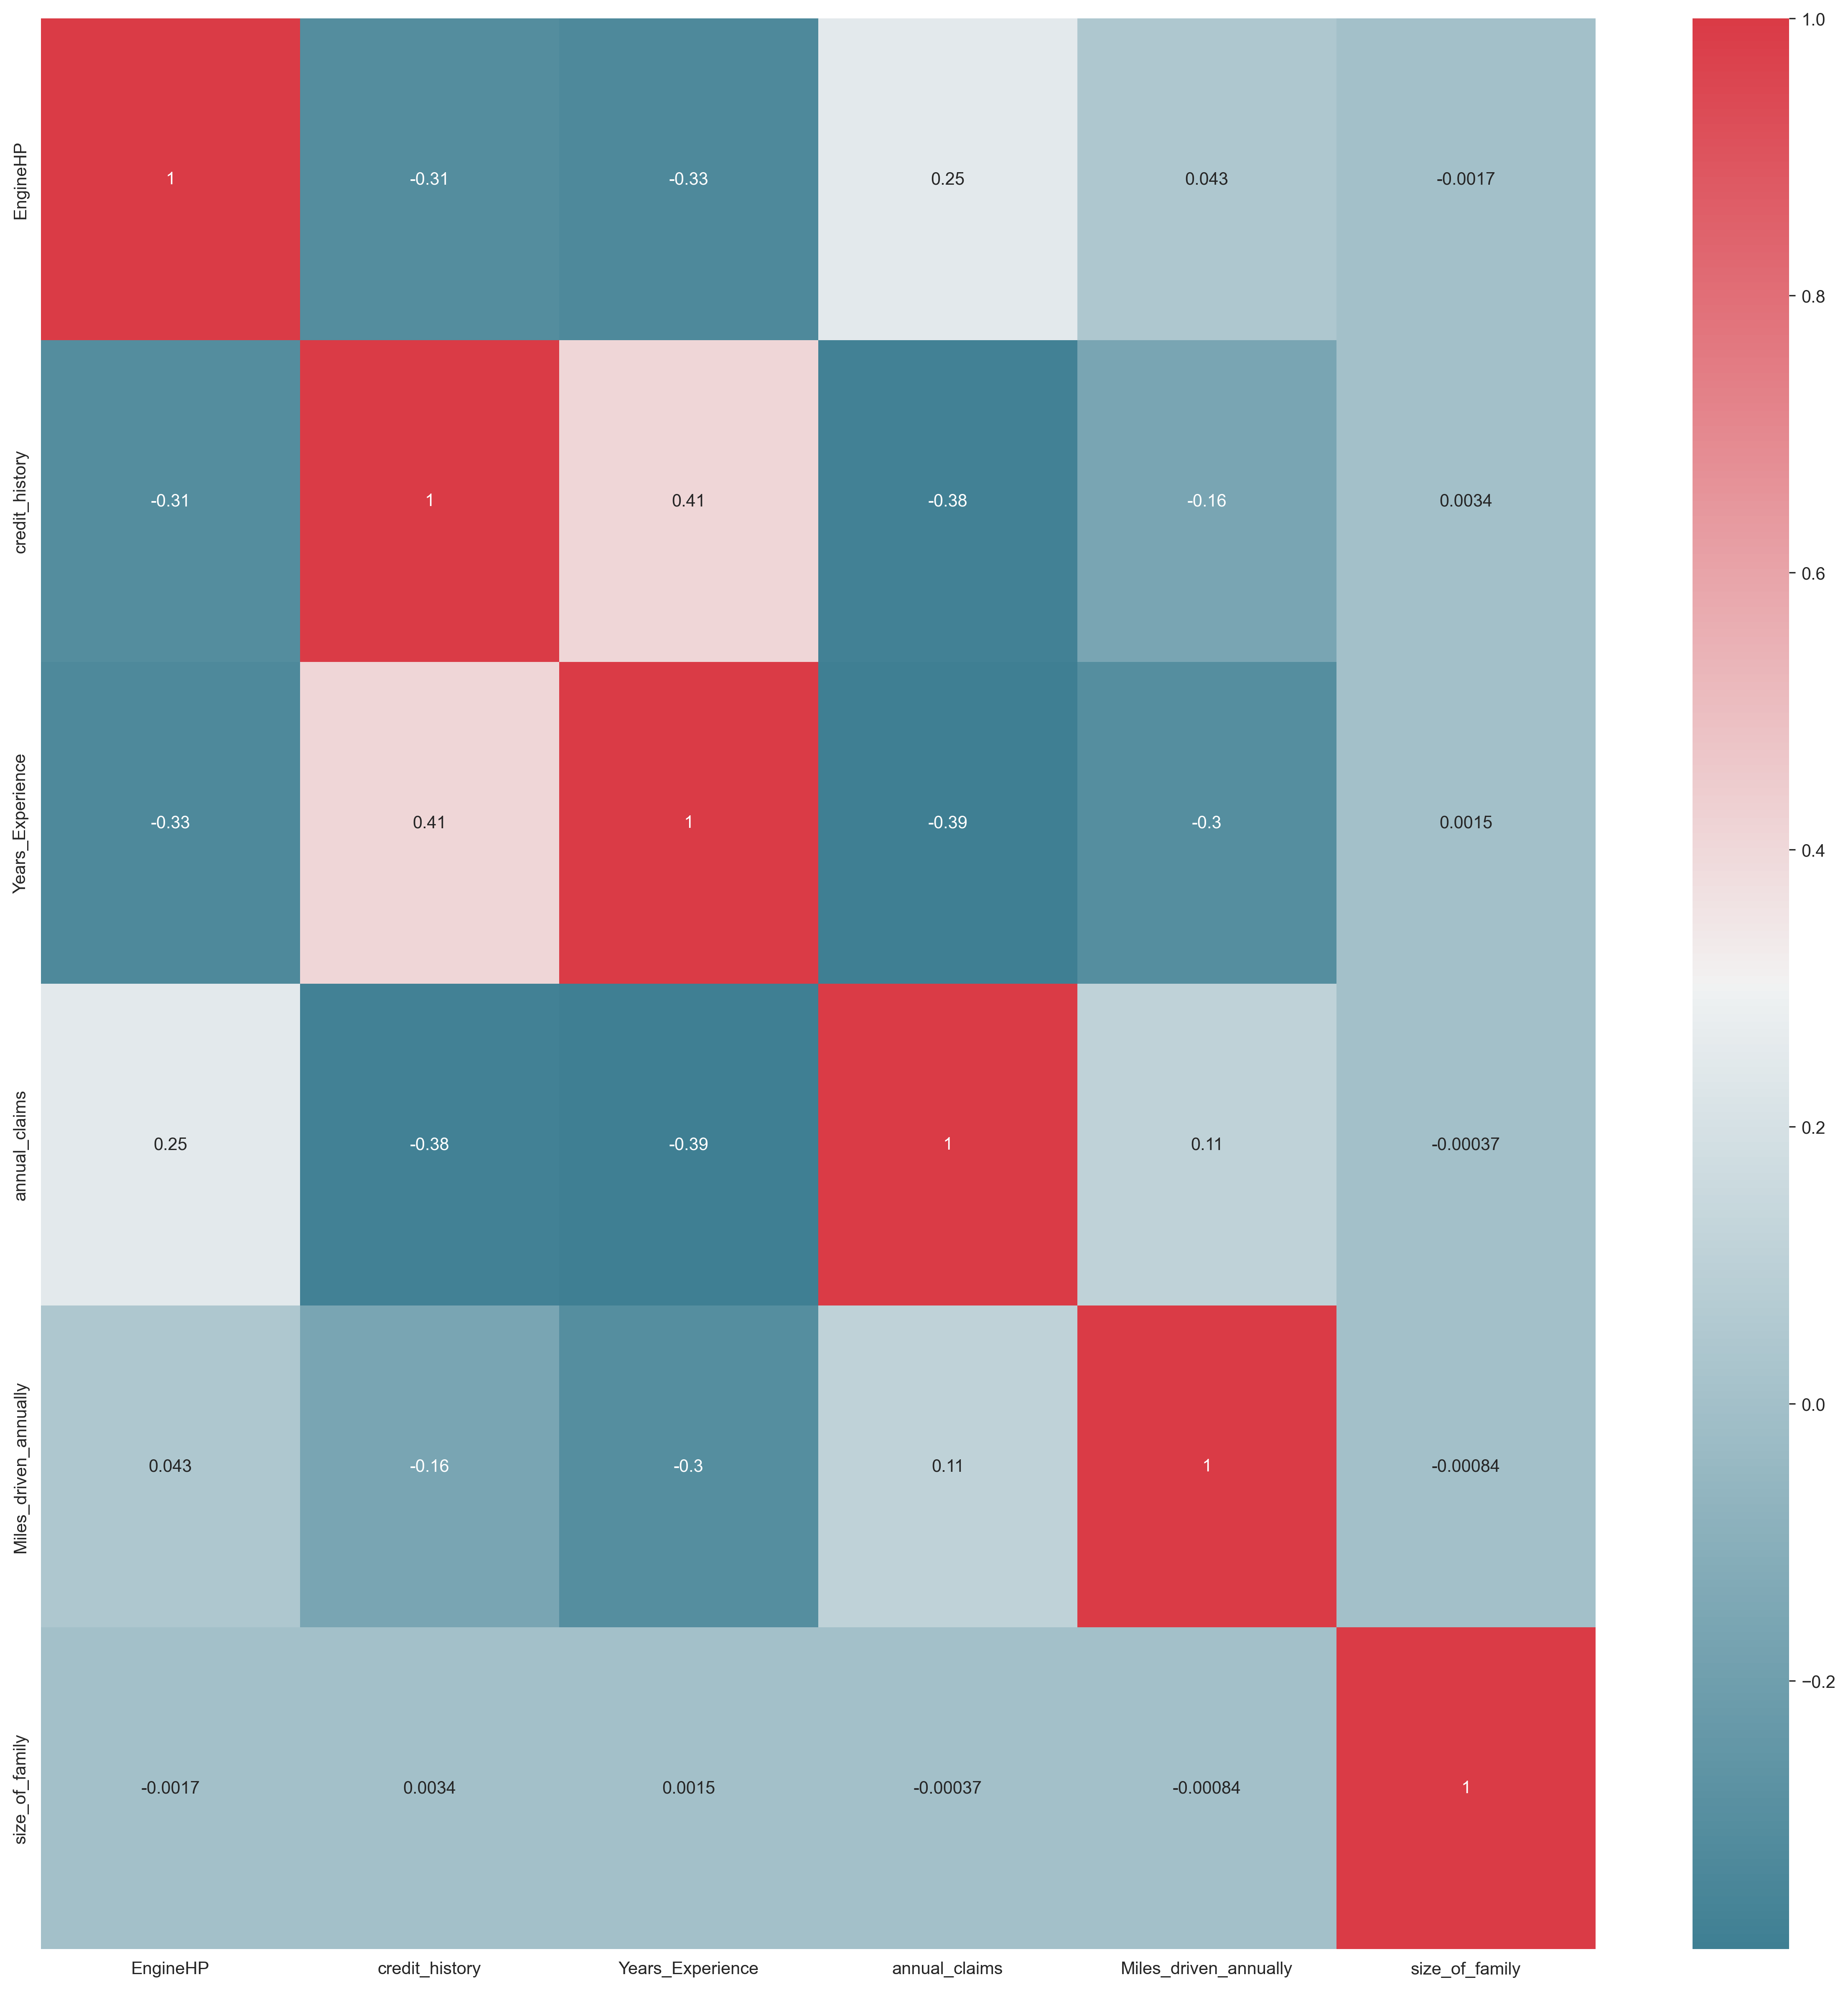

In [26]:
sns.set_style('white')
color_map = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(20, 20))
sns.heatmap(safe_driver_num_features.corr(), annot=True, cmap=color_map)
plt.plot()

In [27]:
safe_driver_num_features = pd.concat(
    [safe_driver_num_features, safe_driver['target']], axis=1)

In [28]:
safe_driver_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EngineHP               30240 non-null  int64  
 1   credit_history         30240 non-null  int64  
 2   Years_Experience       30240 non-null  int64  
 3   annual_claims          30240 non-null  int64  
 4   Miles_driven_annually  30232 non-null  float64
 5   size_of_family         30240 non-null  int64  
 6   target                 30240 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181440 entries, 0 to 181439
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   target    181440 non-null  int64  
 1   variable  181440 non-null  object 
 2   value     181432 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ MB


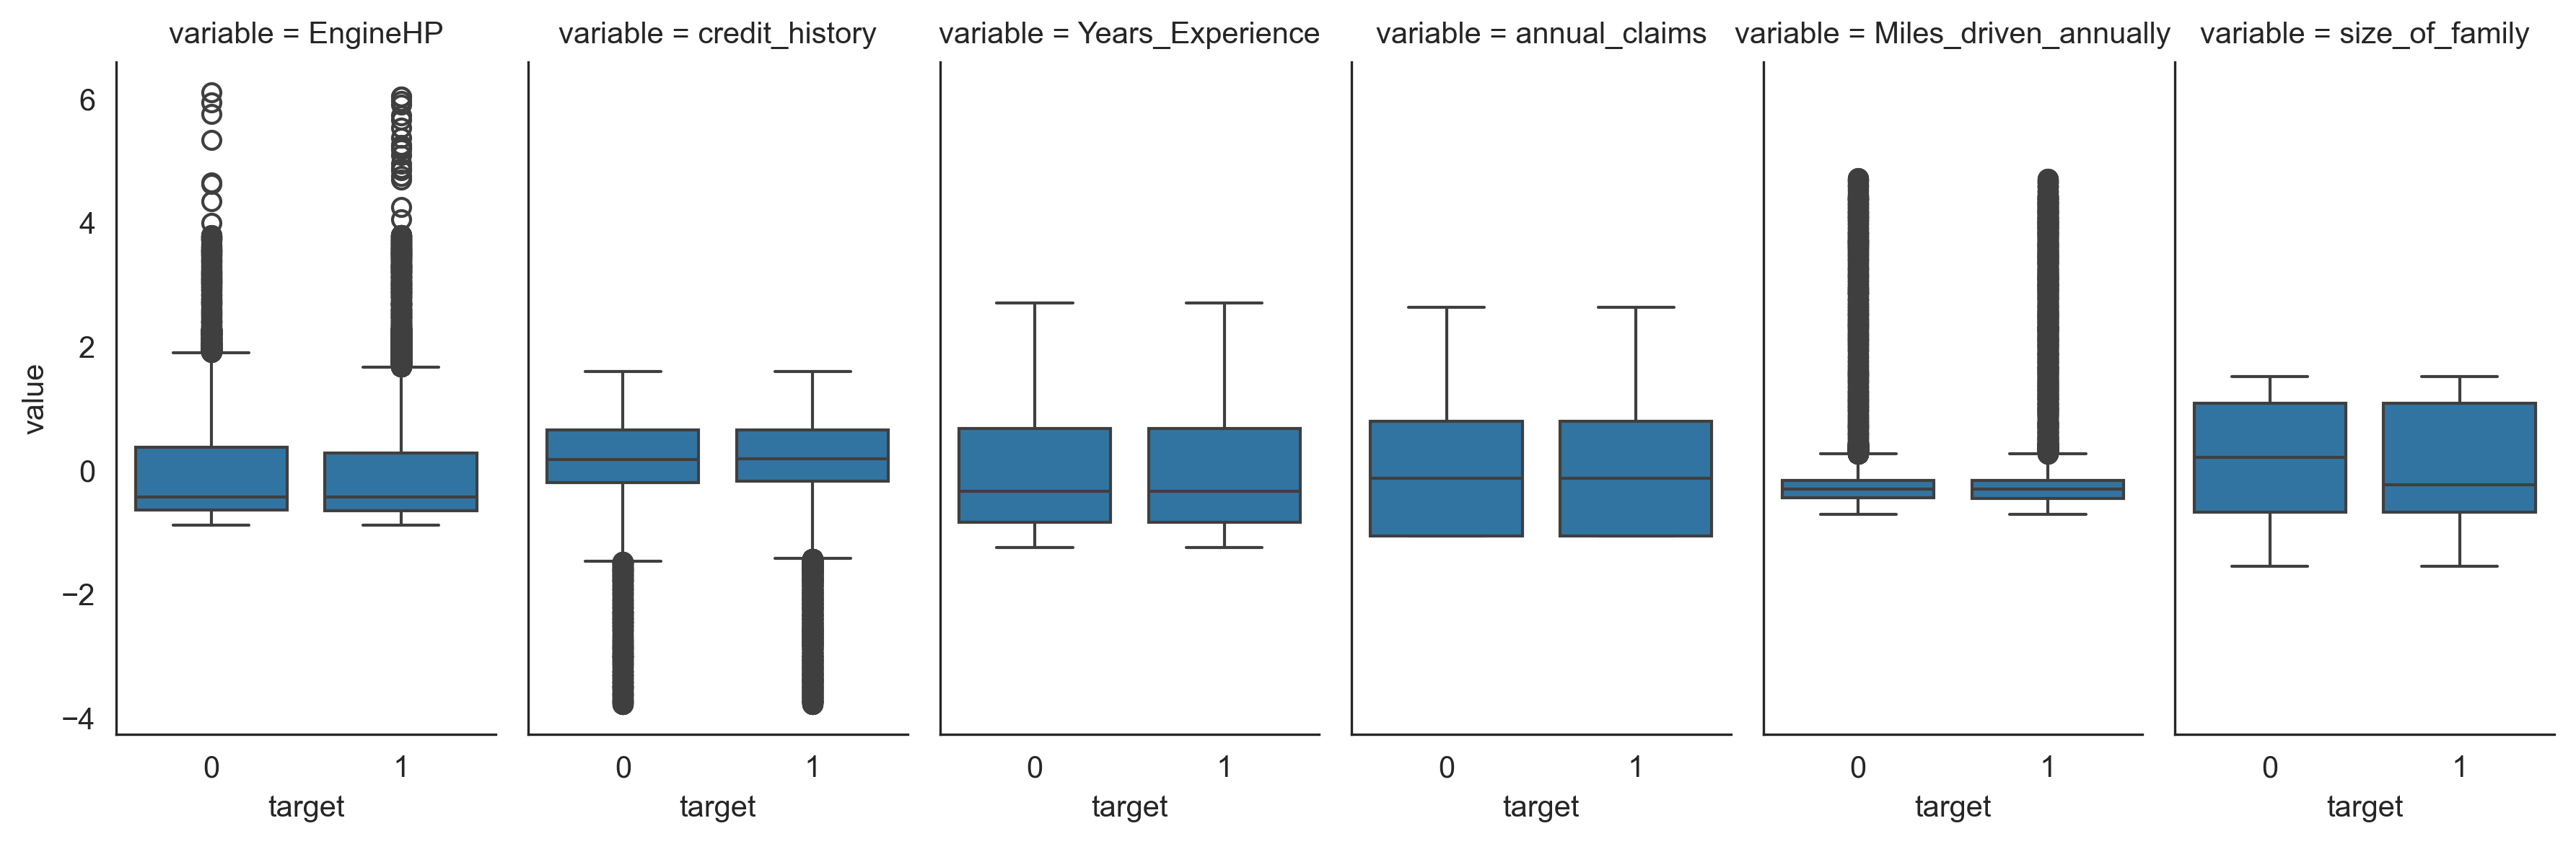

In [29]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

safe_driver_melt = pd.melt(safe_driver_scaled, id_vars=['target'])
safe_driver_melt.info()

g = sns.FacetGrid(safe_driver_melt, col='variable', height=4, aspect=0.5)
g = g.map(sns.boxplot, "target", "value")

plt.show()



<br>
1. Gender: 1 = Female and 2 = Male<br>
2. Marital_Status: 1 = Single and 2 = Married<br>
3. Vehicle_Type: Use LabelEncoder<br>
4. Age_bucket: Use LabelEncoder<br>
<br>

In [30]:
safe_driver.head(10)

,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family,target,Gender,Marital_Status,Vehical_type,Age_bucket,State
0,2.459,-0.291,-1.239,-1.051,-0.153,0.209,1,F,Married,Car,<18,IL
1,3.736,0.178,0.277,-1.051,-0.116,0.647,1,F,Married,Car,28-34,NJ
2,-0.481,0.051,0.176,-1.051,-0.427,-0.665,1,M,Married,Van,>40,CT
3,-0.382,0.334,-0.430,-1.051,3.426,-0.665,1,M,Married,Van,18-27,CT
4,-0.518,0.832,1.996,-0.128,-0.185,-0.228,1,M,Married,Van,>40,WY
5,-0.397,0.354,0.480,-0.128,-0.298,1.521,1,F,Married,Truck,>40,DE
6,-0.345,0.998,1.794,1.719,-0.198,-1.103,1,F,Married,Truck,>40,NJ
7,-0.821,0.598,0.783,-0.128,-0.184,0.209,1,F,Single,Car,>40,ME
8,3.449,0.305,2.097,-1.051,-0.019,-1.540,1,F,Married,Car,>40,CA
9,-0.579,0.969,0.581,-0.128,-0.648,-1.540,0,F,Married,Truck,35-40,NJ


In [34]:

X = safe_driver.drop(['target', 'State'], axis=1)
y = safe_driver['target']
X = X.dropna(axis=1)


 target label is 70% failure (bad driver or target == 1) and 30% success (good driver or target == 0),use SMOTE method

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)

columns = X.columns
os_data_X, os_data_y = os.fit_sample(X, y)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])


X_train, X_test, y_train, y_test = train_test_split(
    os_data_X, os_data_y, test_size=0.3, random_state=0)

print("length of oversampled data is ", len(os_data_X))
print("Number of negative class in oversampled data",
      len(os_data_y[os_data_y['y'] == 0]))
print("Number of positive class in oversampled data",
      len(os_data_y[os_data_y['y'] == 1]))
print("Proportion of negative class in oversampled data is ",
      len(os_data_y[os_data_y['y'] == 0])/len(os_data_X))
print("Proportion of positive class in oversampled data is ",
      len(os_data_y[os_data_y['y'] == 1])/len(os_data_X))

length of oversampled data is  42792
Number of negative class in oversampled data 21396
Number of positive class in oversampled data 21396
Proportion of negative class in oversampled data is  0.5
Proportion of positive class in oversampled data is  0.5


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=12)
regr.fit(X, y)

feature_importances = pd.DataFrame(regr.feature_importances_, index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                       importance
credit_history              0.378
Miles_driven_annually       0.329
EngineHP                    0.203
Years_Experience            0.059
Gender                      0.031
annual_claims               0.000
size_of_family              0.000
Marital_Status              0.000
Vehicle_Type                0.000
Age_bucket                  0.000


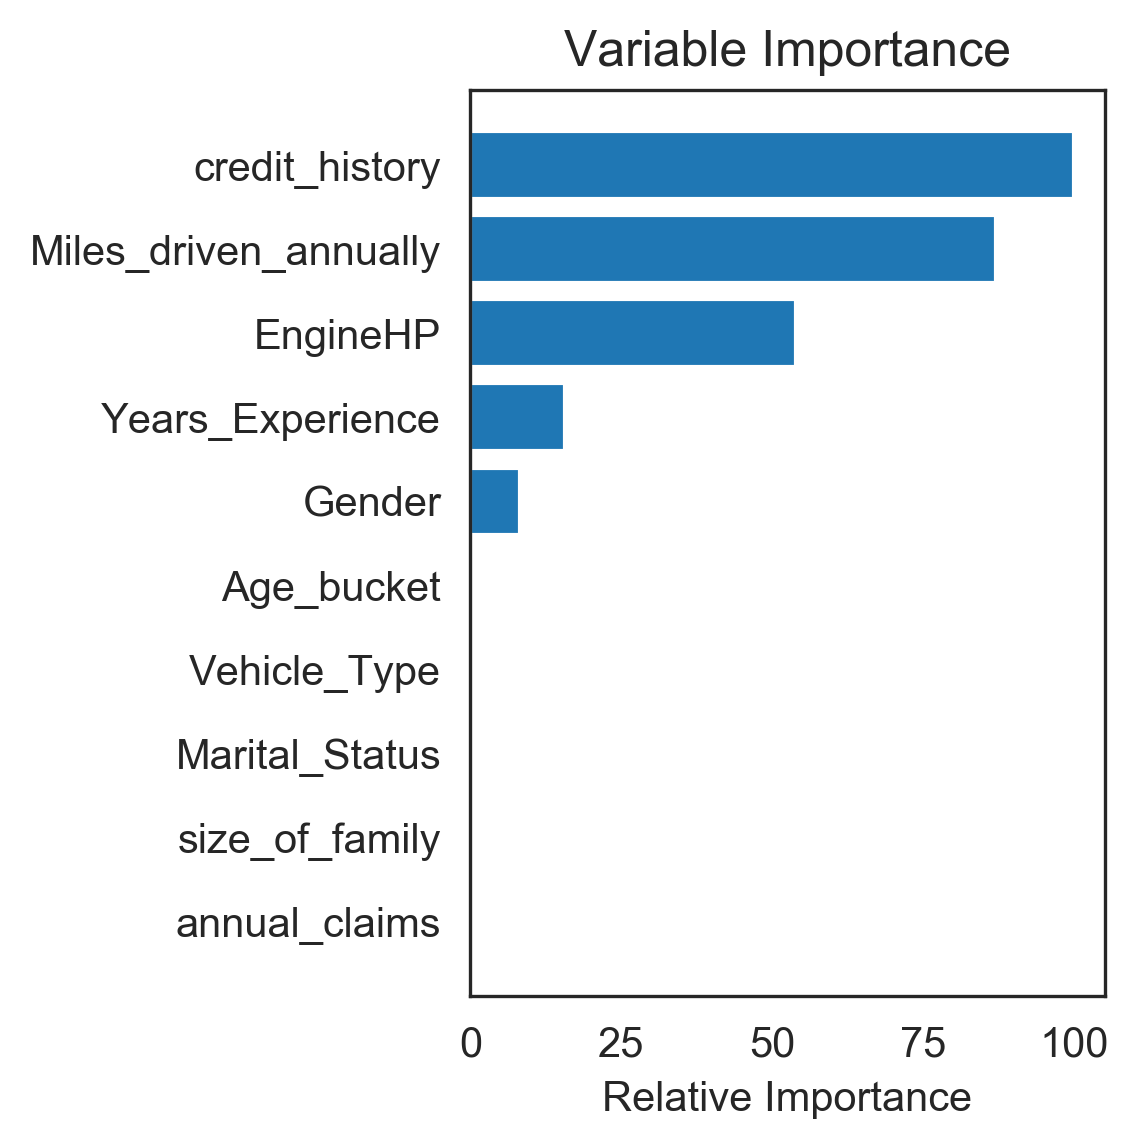

In [ ]:
feature_importance = regr.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<h2>Decision Tree Classifier</h2>

In [ ]:

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_predict = tree.predict(X_test)
tree.score(X_test, y_test)

dt_train_scores = cross_val_score(
    estimator=tree, X=X_train, y=y_train, cv=5, n_jobs=4)
dt_test_scores = cross_val_score(
    estimator=tree, X=X_test, y=y_predict, cv=5, n_jobs=4)

In [ ]:

target_names = ['Safe Driver', 'Non-safe Driver']
decision_tree = classification_report(
    y_test, y_predict, target_names=target_names, output_dict=True)

In [ ]:

confusion_matrix(y_test, y_predict)

array([[4371, 2047],
       [2228, 4192]])

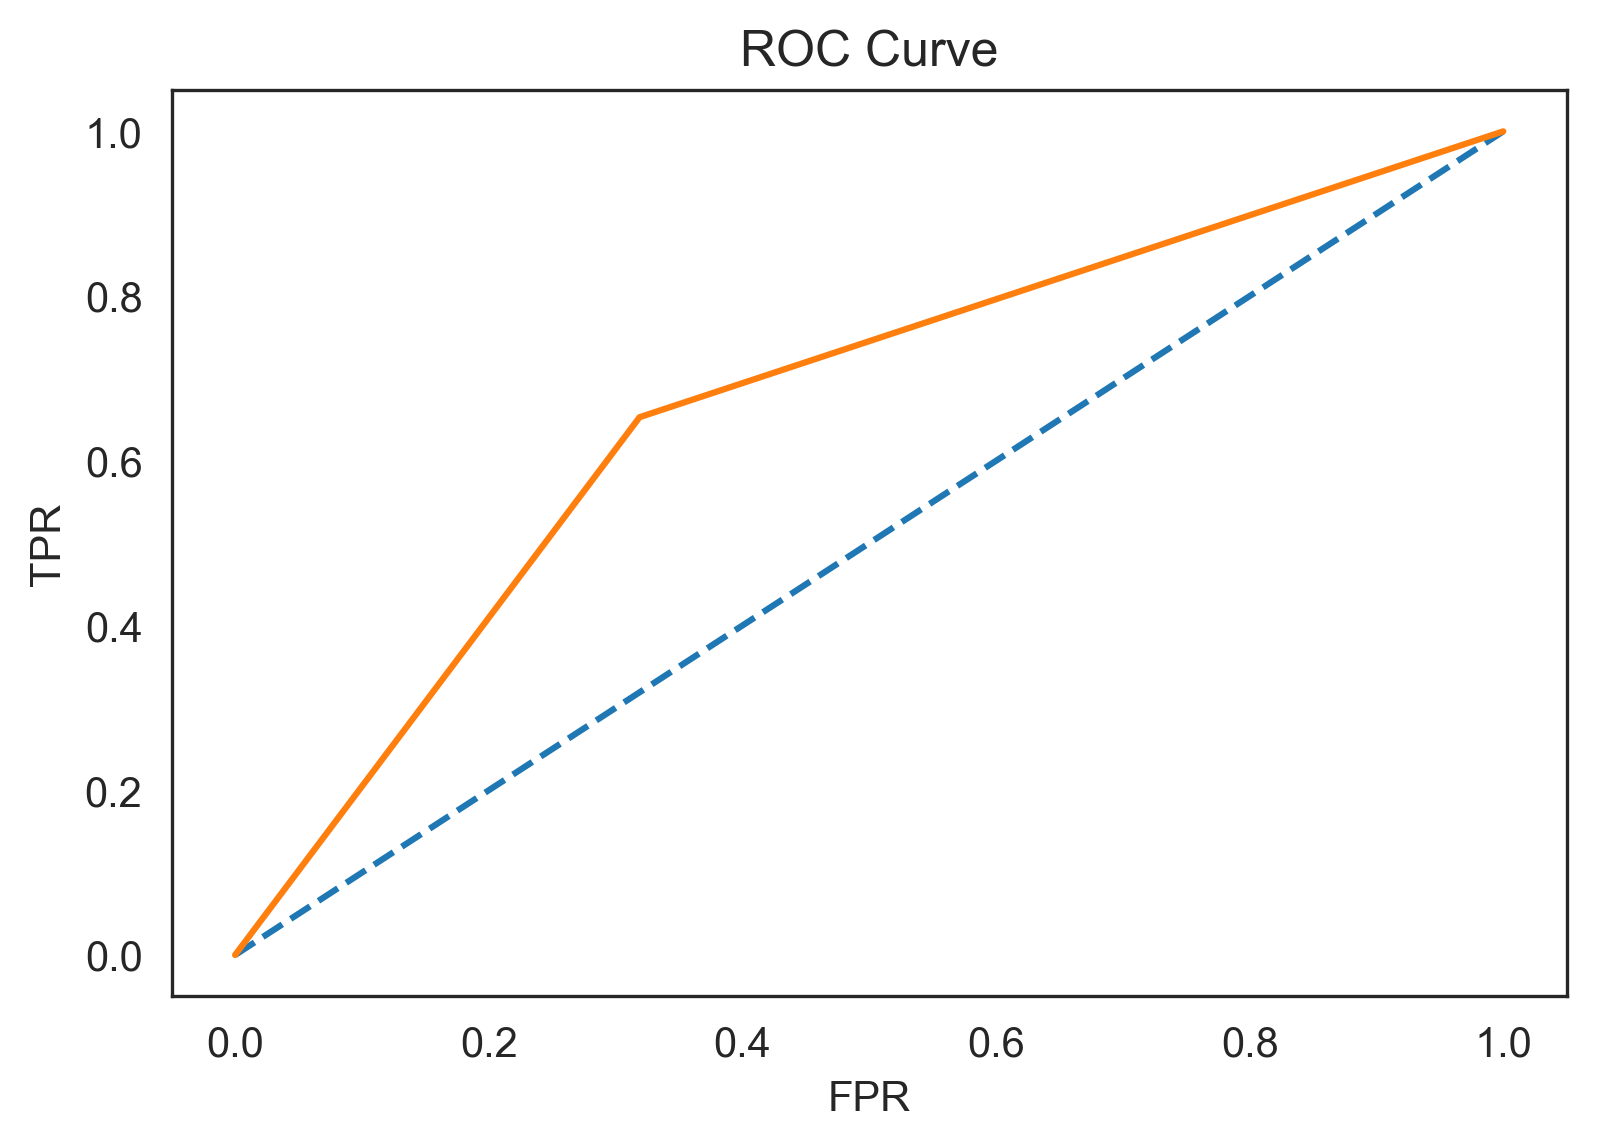

0.6670063945930884


In [ ]:
probs = tree.predict_proba(X_test)
probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probs)
print(auc)

####  It is showing a high number of false positives and false negatives

<h2>Support Vector Classifier</h2>

In [ ]:
# Run Support Vector Classifier to verify accuracy

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, y_train)

y_predict = svc.predict(X_train)

svc.score(X_test, y_test)

svc_train_score = cross_val_score(svc, X_train, y_train, cv=5)
svc_test_score = cross_val_score(svc, X_test, y_test, cv=5)

In [ ]:
print(svc_train_score)
print(svc_test_score)

[0.52086115 0.52411951 0.51443832 0.52270451 0.5245409 ]
[0.52803738 0.51985981 0.53543614 0.52863265 0.51421893]


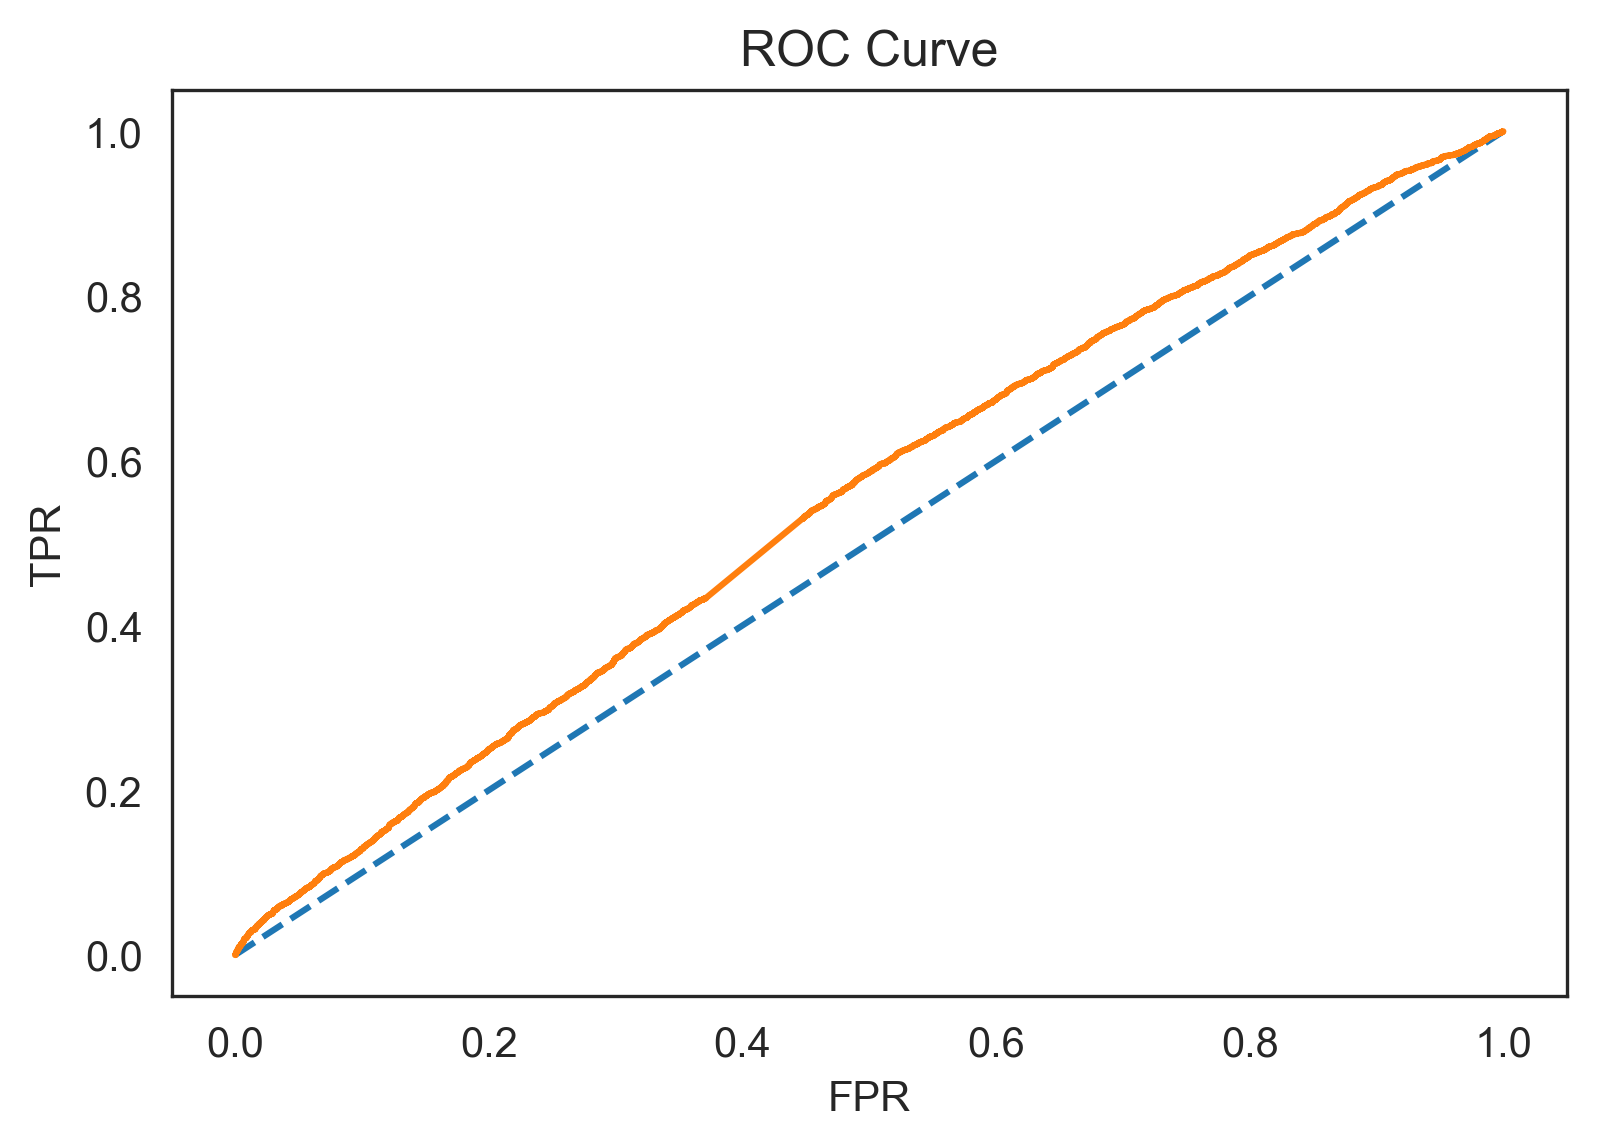

0.5523195083143301


In [ ]:
probs = svc.predict_proba(X_test)

probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probs)
print(auc)

In [ ]:
target_names = ['Safe Driver', 'Non-safe Driver']
svc_scores = classification_report(
    y_train, y_predict, target_names=target_names, output_dict=True)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_predict)

array([[10127,  4851],
       [ 8381,  6595]])

The SVM Classifier returns less than better results than the DecisionTree model.<br>
<br>
so use SGDClassifier.

<h2>Stochastic Gradient Descent Classifier</h2>

In [ ]:


from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=10000, tol=1e-3)
clf.fit(X_train, y_train)

y_predict_SGD = clf.predict(X_train)

clf.score(X_train, y_train)

0.49943246311010214

In [ ]:
sgd_train_score = cross_val_score(clf, X_train, y_train, cv=5)
sgd_test_score = cross_val_score(clf, X_test, y_test, cv=5)
print(sgd_train_score)
print(sgd_test_score)

[0.49315754 0.50258721 0.50175263 0.49866444 0.49933222]
[0.49805296 0.5046729  0.50778816 0.49980522 0.50175302]


In [ ]:

target_names = ['Safe Driver', 'Non-safe Driver']
sgd_scores = classification_report(
    y_train, y_predict, target_names=target_names, output_dict=True)

In [ ]:
confusion_matrix(y_train, y_predict_SGD)

array([[8925, 6053],
       [8941, 6035]])

<h2>Support Vector Classifier with different tuning parameters</h2>

In [ ]:
from sklearn.svm import SVC

classifier = SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
                 decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
                 max_iter=-1, probability=False, random_state=None, shrinking=True,
                 tol=0.001, verbose=False)

classifier = classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_train)

In [ ]:
svc_2_train_score = cross_val_score(classifier, X_train, y_train, cv=5)
svc_2_test_score = cross_val_score(classifier, X_test, y_test, cv=5)
print(svc_2_train_score)
print(svc_2_test_score)

[0.52653538 0.53747288 0.5386413  0.54440735 0.54373957]
[0.53894081 0.5241433  0.54127726 0.540709   0.5290222 ]


In [ ]:
confusion_matrix(y_train, y_predict)

array([[10362,  4616],
       [ 7567,  7409]])

In [ ]:

target_names = ['Safe Driver', 'Non-safe Driver']
svc_2_scores = classification_report(
    y_train, y_predict, target_names=target_names, output_dict=True)

<h2>Ridge Classifier</h2>

In [ ]:


from sklearn.linear_model import RidgeClassifier
#
clf = RidgeClassifier().fit(X_train, y_train)
clf.score(X_train, y_train) 
y_predict = classifier.predict(X_train)

In [ ]:
ridge_train_score = cross_val_score(clf, X_train, y_train, cv=5)
ridge_test_score = cross_val_score(clf, X_test, y_test, cv=5)
print(ridge_train_score)
print(ridge_test_score)

[0.50433912 0.50392255 0.49207144 0.50868114 0.50784641]
[0.51596573 0.50778816 0.51635514 0.49785742 0.4970783 ]


In [ ]:
target_names = ['Safe Driver', 'Non-safe Driver']
ridge_scores = classification_report(y_train, y_predict, target_names=target_names,
                                     output_dict=True)

<h2>Gradient Boosting Classifier</h2>

In [ ]:


from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(loss='deviance', max_depth=10)
clf_model = clf.fit(X_train, y_train)
print(clf_model)
print('Training set score:', clf.score(X_train, y_train))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Training set score: 0.8975095145890365


In [ ]:
CLF_score = cross_val_score(clf, X_train, y_train, cv=5)
print('\nEach Cross Validated Accuracy: \n', CLF_score)
print("\nOverall Gradient Boosted Classifier Accuracy: %0.2f (+/- %0.2f)\n" %
      (CLF_score.mean(), CLF_score.std() * 2))


Each Cross Validated Accuracy: 
 [0.74699599 0.75179436 0.75296278 0.7509182  0.7509182 ]

Overall Gradient Boosted Classifier Accuracy: 0.75 (+/- 0.00)



In [ ]:
CLF_test_score = cross_val_score(clf, X_test, y_test, cv=5)

In [ ]:
y_predict = clf.predict(X_train)
target_names = ['Safe Driver', 'Non-safe Driver']
GB_scores = classification_report(
    y_train, y_predict, target_names=target_names, output_dict=True)
confusion_matrix(y_train, y_predict)

array([[11977,  3001],
       [   69, 14907]])

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
y_predict = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.89%


In [ ]:
XGB_scores = classification_report(
    y_test, y_predict, target_names=target_names, output_dict=True)
XGB_train_score = cross_val_score(model, X_train, y_train, cv=5)
XGB_test_score = cross_val_score(model, X_test, y_test, cv=5)
print(XGB_train_score)
print(XGB_test_score)

[0.69225634 0.69203806 0.70205308 0.69949917 0.70701169]
[0.68185358 0.6826324  0.69314642 0.70315543 0.69925984]


<h2>Summary of Precision and Recall scores</h2>

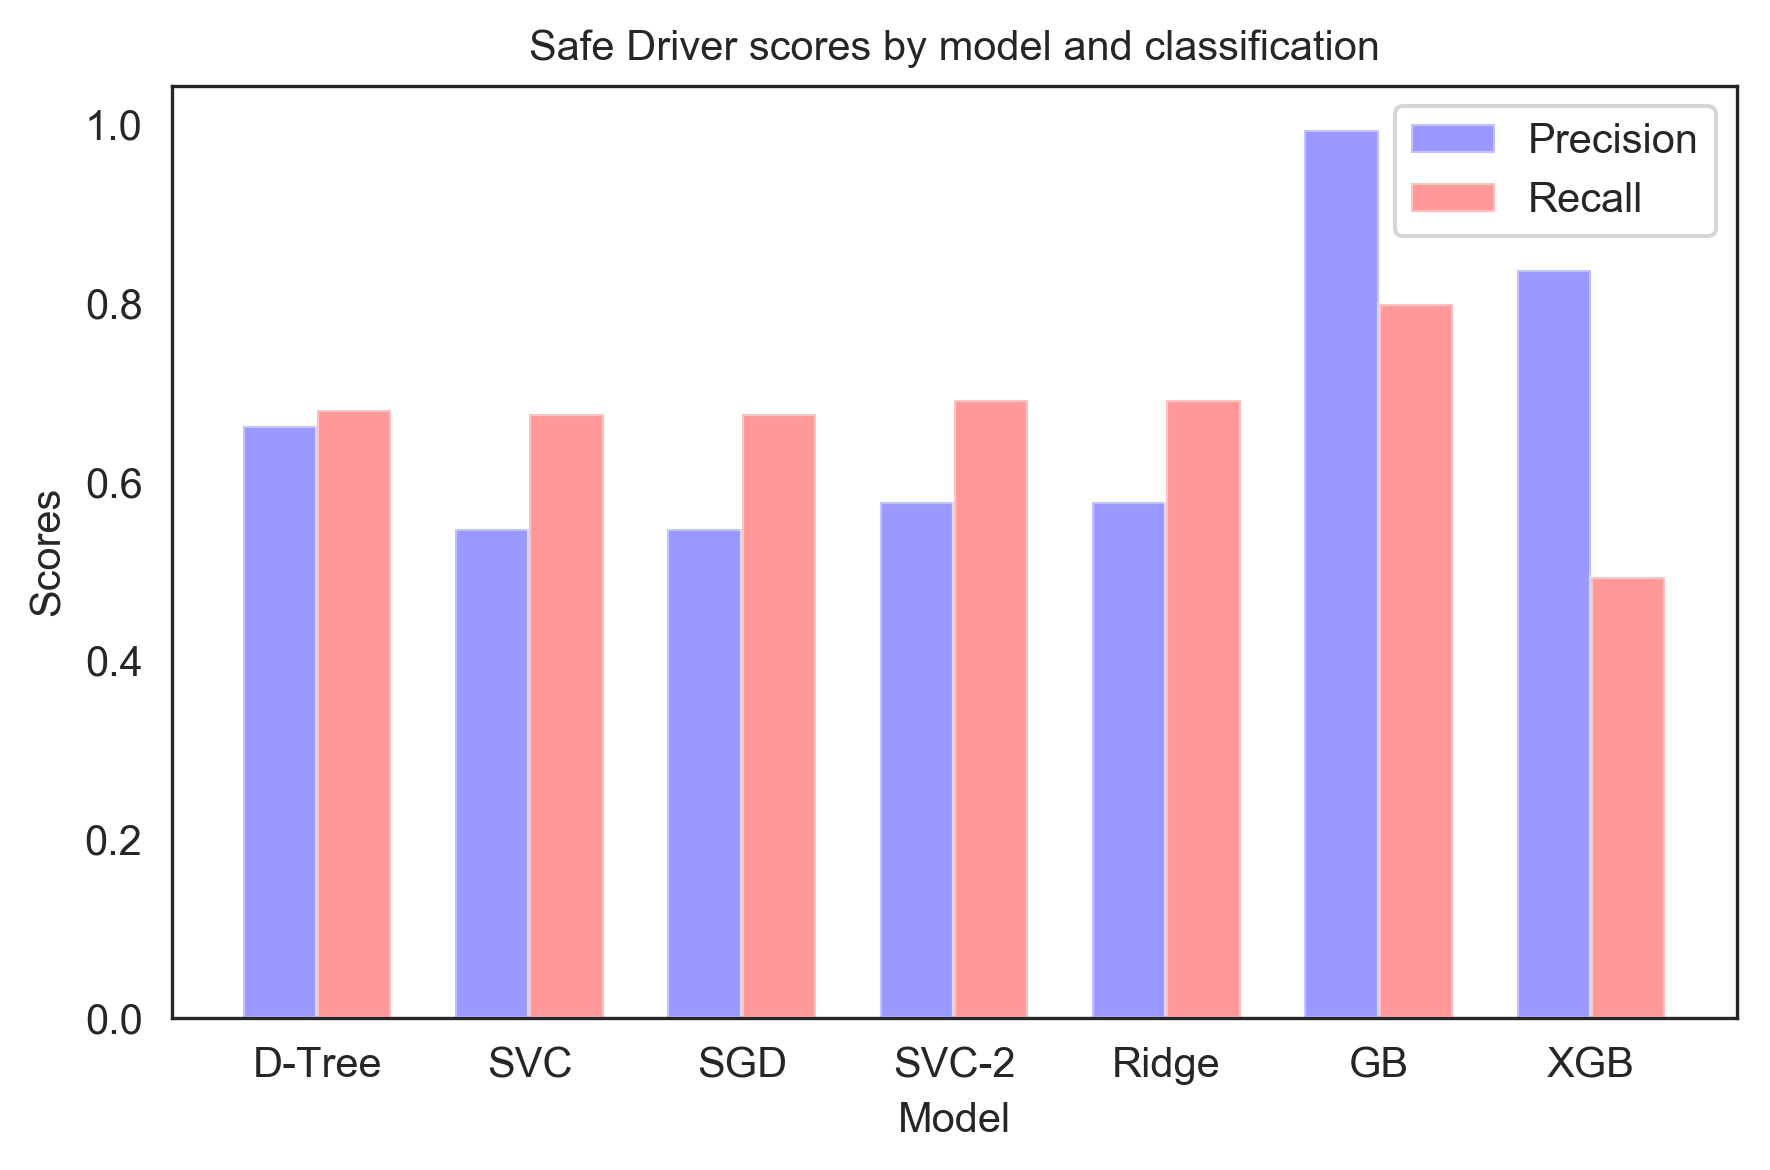

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import matplotlib as mpl

mpl.rcParams['figure.dpi']= 300

n_groups = 7

precision = (decision_tree['Safe Driver']['precision'],
             svc_scores['Safe Driver']['precision'],
             sgd_scores['Safe Driver']['precision'],
             svc_2_scores['Safe Driver']['precision'],
             ridge_scores['Safe Driver']['precision'],
             GB_scores['Safe Driver']['precision'],
             XGB_scores['Safe Driver']['precision'])

recall = (decision_tree['Safe Driver']['recall'],
          svc_scores['Safe Driver']['recall'],
          sgd_scores['Safe Driver']['recall'],
          svc_2_scores['Safe Driver']['recall'],
          ridge_scores['Safe Driver']['recall'],
          GB_scores['Safe Driver']['recall'],
          XGB_scores['Safe Driver']['recall'])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, precision, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Precision')

rects2 = ax.bar(index + bar_width, recall, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='Recall')

ax.set_xlabel('Model', fontsize=10)
ax.set_ylabel('Scores', fontsize=10)
ax.set_title('Safe Driver scores by model and classification', fontsize=10)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('D-Tree', 'SVC', 'SGD', 'SVC-2',
                    'Ridge', 'GB', 'XGB'), fontsize=10)
ax.legend()

fig.tight_layout()

plt.savefig('Safe_Driver_Bargraph_200.eps', dpi=200)

plt.show()

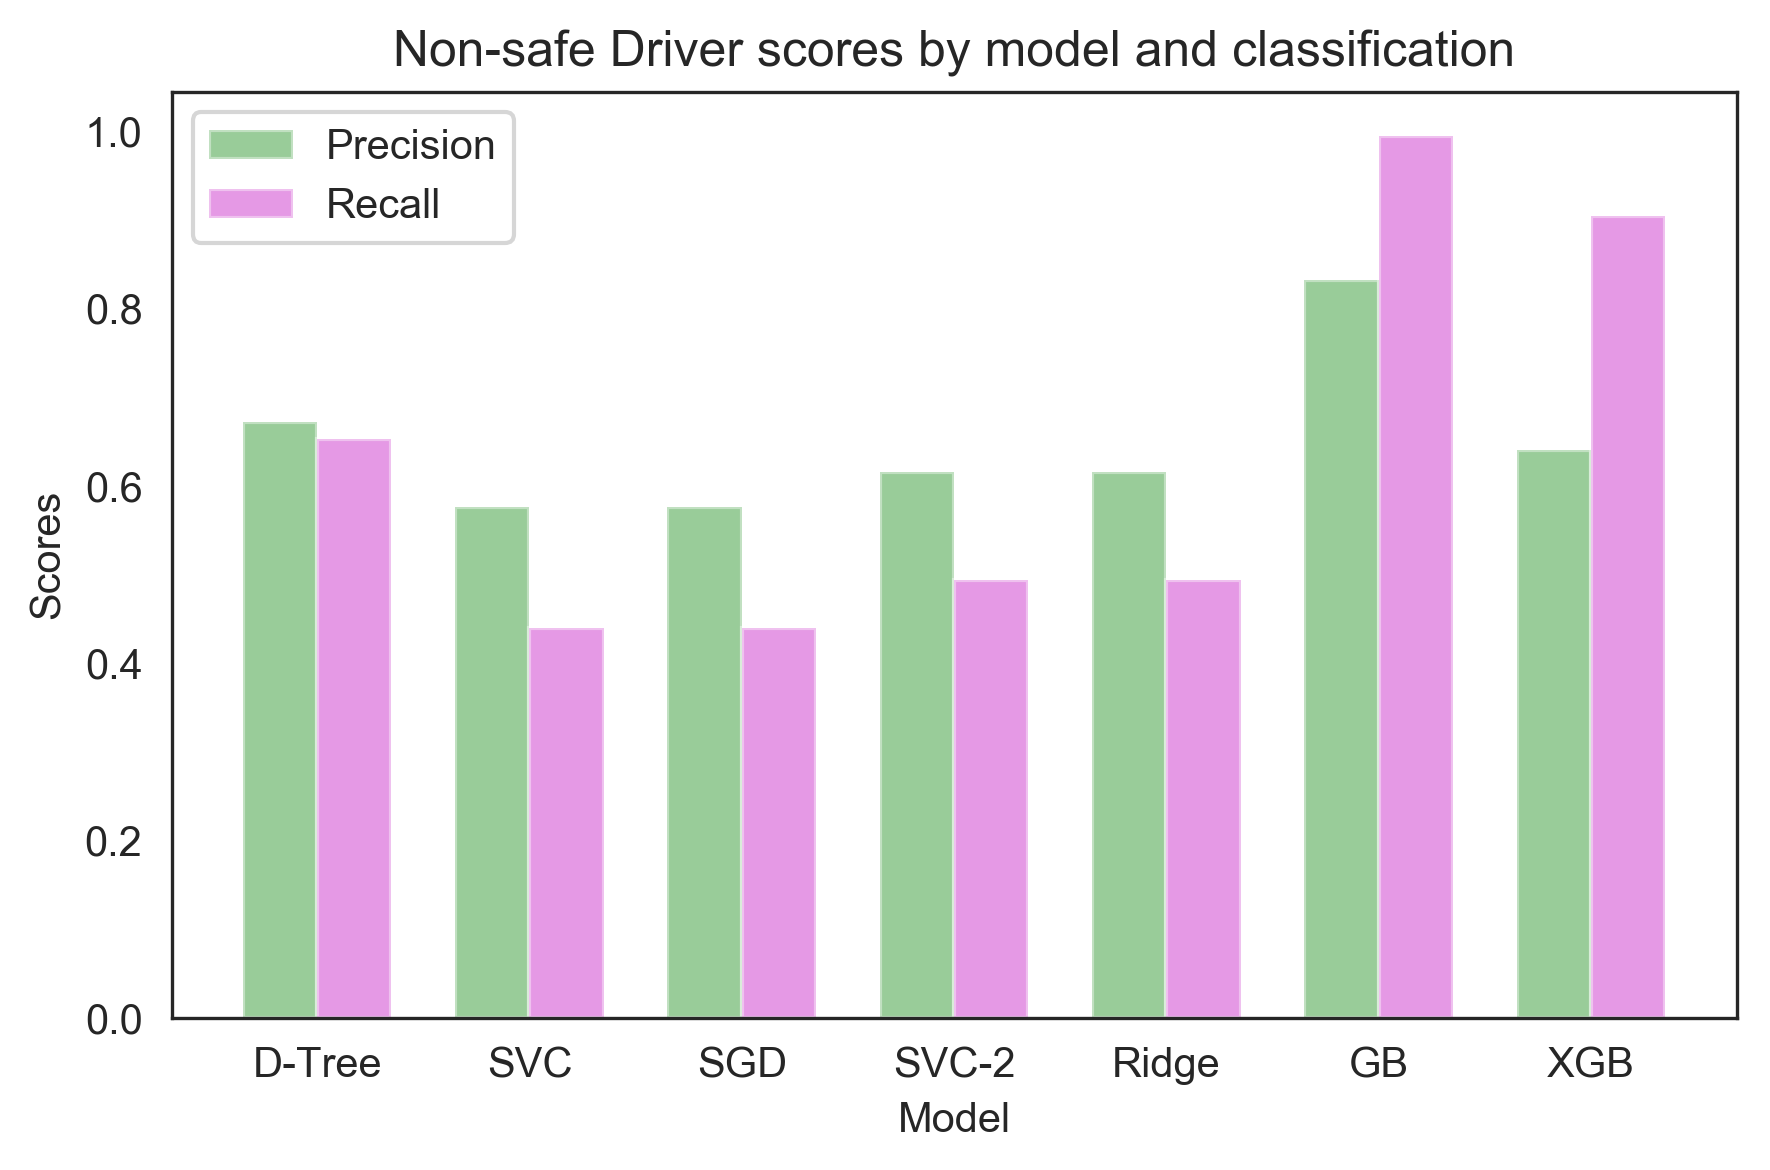

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 7

precision = (decision_tree['Non-safe Driver']['precision'],
             svc_scores['Non-safe Driver']['precision'],
             sgd_scores['Non-safe Driver']['precision'],
             svc_2_scores['Non-safe Driver']['precision'],
             ridge_scores['Non-safe Driver']['precision'],
             GB_scores['Non-safe Driver']['precision'],
             XGB_scores['Non-safe Driver']['precision'])

recall = (decision_tree['Non-safe Driver']['recall'],
          svc_scores['Non-safe Driver']['recall'],
          sgd_scores['Non-safe Driver']['recall'],
          svc_2_scores['Non-safe Driver']['recall'],
          ridge_scores['Non-safe Driver']['recall'],
          GB_scores['Non-safe Driver']['recall'],
          XGB_scores['Non-safe Driver']['recall'])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, precision, bar_width,
                alpha=opacity, color='g',
                error_kw=error_config,
                label='Precision')

rects2 = ax.bar(index + bar_width, recall, bar_width,
                alpha=opacity, color='m',
                error_kw=error_config,
                label='Recall')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Non-safe Driver scores by model and classification')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('D-Tree', 'SVC', 'SGD', 'SVC-2', 'Ridge', 'GB', 'XGB'))
ax.legend()

fig.tight_layout()

plt.savefig('Non-safe_Driver_Bargraph_200.eps', dpi=200)

plt.show()

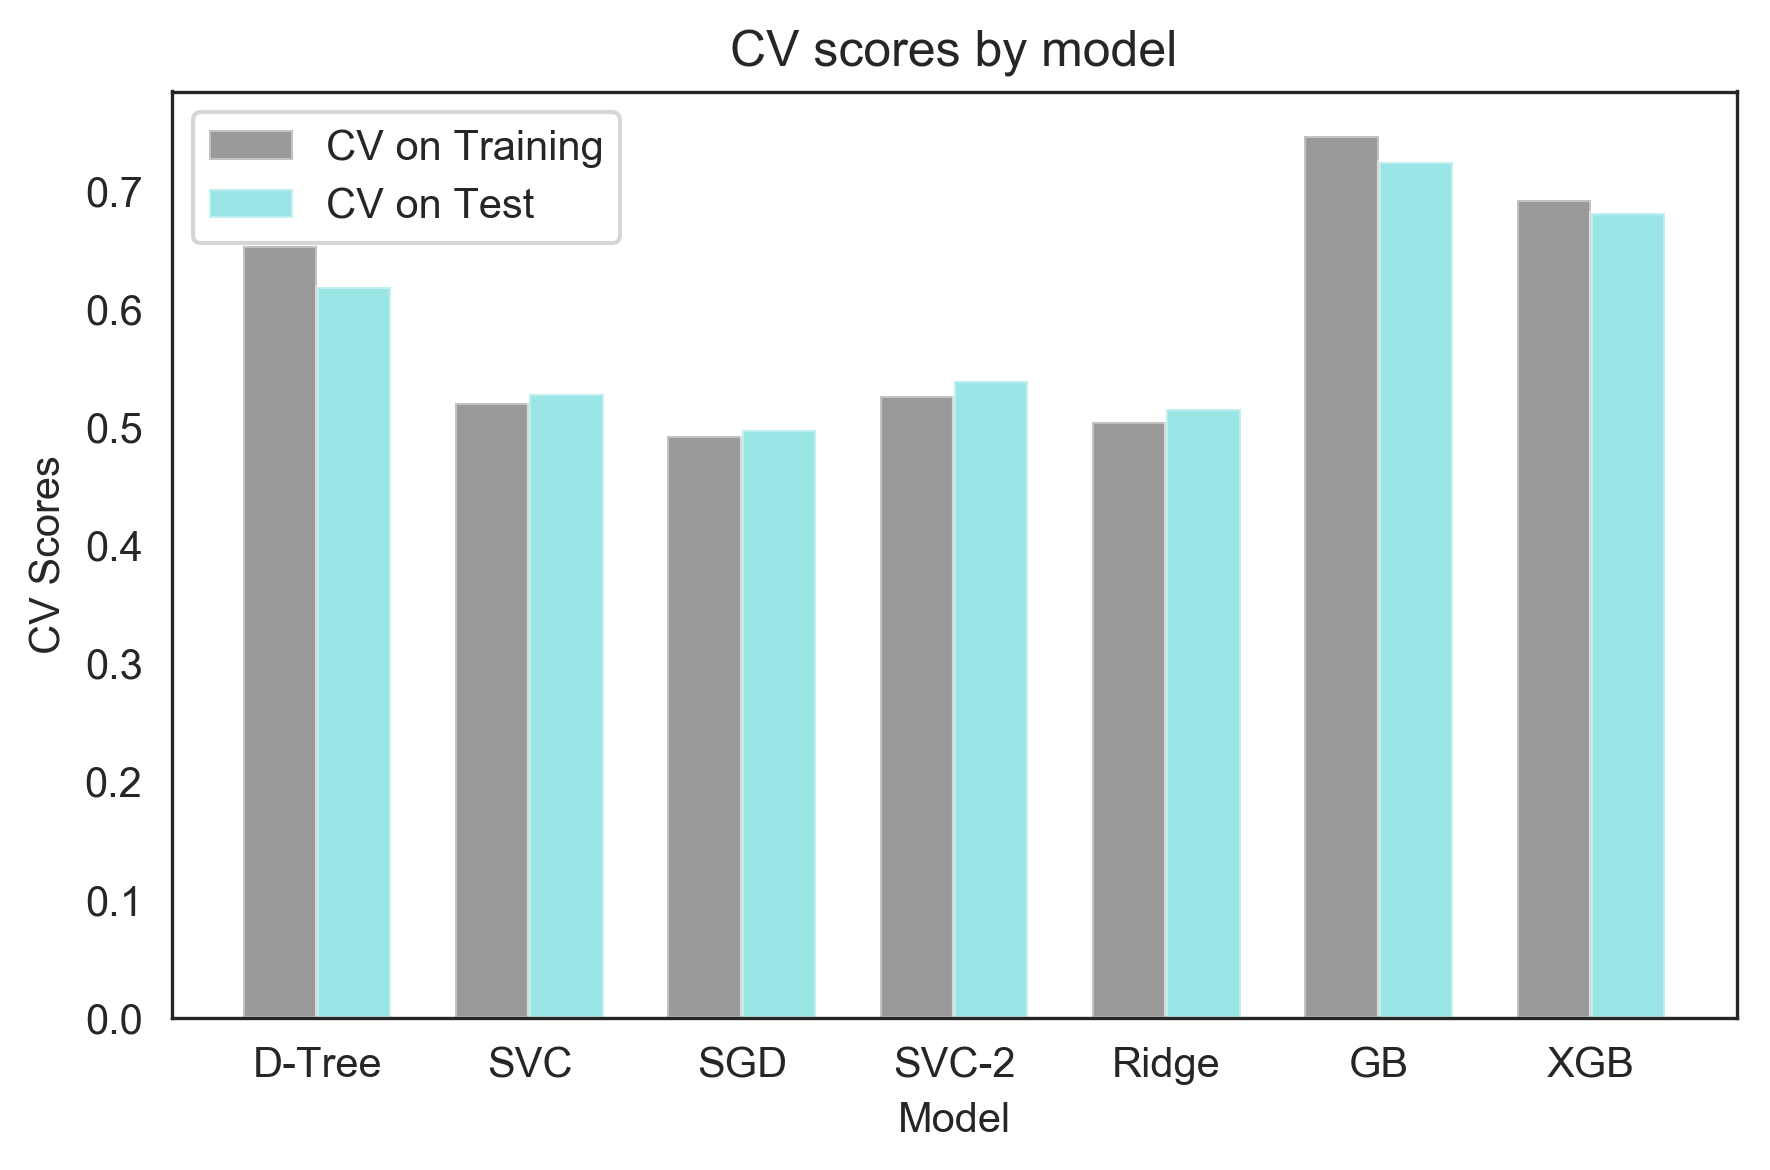

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 7

cv_train = (dt_train_scores[0],
            svc_train_score[0],
            sgd_train_score[0],
            svc_2_train_score[0],
            ridge_train_score[0],
            CLF_score[0],
            XGB_train_score[0])

cv_test = (dt_test_scores[0],
           svc_test_score[0],
           sgd_test_score[0],
           svc_2_test_score[0],
           ridge_test_score[0],
           CLF_test_score[0],
           XGB_test_score[0])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, cv_train, bar_width,
                alpha=opacity, color='k',
                error_kw=error_config,
                label='CV on Training')

rects2 = ax.bar(index + bar_width, cv_test, bar_width,
                alpha=opacity, color='c',
                error_kw=error_config,
                label='CV on Test')

ax.set_xlabel('Model')
ax.set_ylabel('CV Scores')
ax.set_title('CV scores by model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('D-Tree', 'SVC', 'SGD', 'SVC-2', 'Ridge', 'GB', 'XGB'))
ax.legend()

fig.tight_layout()

plt.savefig('CV_Scores.eps', dpi=200)

plt.show()